In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [2]:
iris = load_iris(as_frame = True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth = 2, random_state = 42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [3]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "decision_trees"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [4]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=str(IMAGES_PATH / "iris_tree.dot"),  # path differs in the book
        feature_names=["petal length (cm)", "petal width (cm)"],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

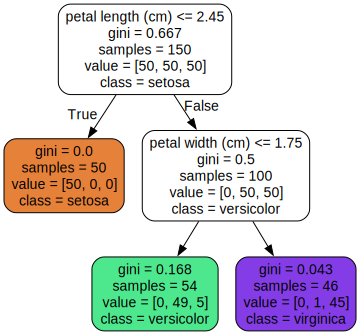

In [5]:
from graphviz import Source

Source.from_file(IMAGES_PATH / "iris_tree.dot")  # path differs in the book

In [6]:
tree_clf.predict_proba([[5,1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [7]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples = 150, noise = 0.2, random_state = 42)

tree_clf1 = DecisionTreeClassifier(random_state = 42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf = 5, random_state = 42)

tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

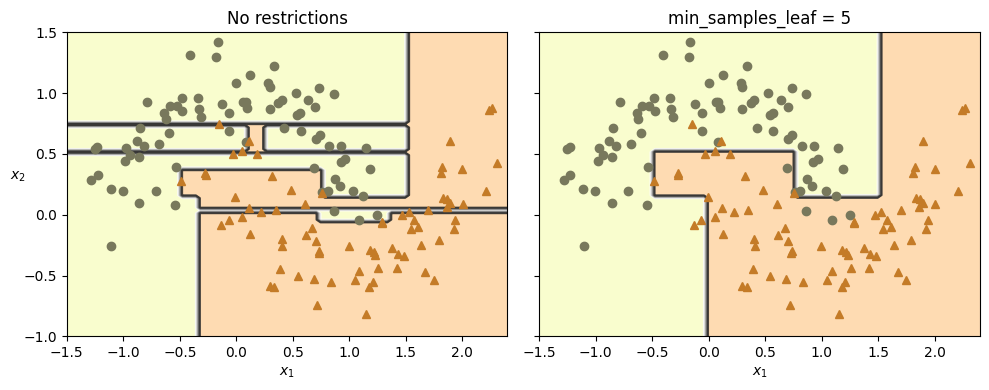

In [8]:
def plot_decision_boundary(clf, X, y, axes, cmap):
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                         np.linspace(axes[2], axes[3], 100))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=cmap)
    plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8)
    colors = {"Wistia": ["#78785c", "#c47b27"], "Pastel1": ["red", "blue"]}
    markers = ("o", "^")
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[cmap][idx], marker=markers[idx], linestyle="none")
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf1, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title("No restrictions")
plt.sca(axes[1])
plot_decision_boundary(tree_clf2, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title(f"min_samples_leaf = {tree_clf2.min_samples_leaf}")
plt.ylabel("")
save_fig("min_samples_leaf_plot")
plt.show()

In [9]:
X_moons_test, y_moons_test = make_moons(n_samples= 1000, noise = 0.2, random_state = 43)

In [10]:
tree_clf1.score(X_moons_test, y_moons_test)

0.898

In [11]:
tree_clf2.score(X_moons_test, y_moons_test)

0.92

In [12]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X_quad = np.random.rand(200,1) - 0.5
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200,1)

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [13]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pca_pipeline = make_pipeline(StandardScaler(), PCA())
X_iris_rotated = pca_pipeline.fit_transform(X_iris)

tree_clf_pca = DecisionTreeClassifier(max_depth = 2, random_state=42)
tree_clf_pca.fit(X_iris_rotated, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [14]:
X, y = make_moons(n_samples = 10000, noise = 0.4, random_state = 42)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

tree_clf = DecisionTreeClassifier()
parameters = {
    'max_leaf_nodes':np.linspace(1,100,100, dtype = 'int'),
    'max_depth':np.linspace(1,7, 7, dtype = 'int'),
    'min_samples_split':np.linspace(2,4,3, dtype = 'int')
}
grid_clf = GridSearchCV(tree_clf, parameters)
grid_clf.fit(X_train, y_train)
grid_clf.best_score_

c:\Users\hugph\ML\venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
105 fits failed out of a total of 10500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
105 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hugph\ML\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hugph\ML\venv\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\hugph\ML\venv\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\hugph\ML\venv\Lib\site-packages\sklea

0.85925

In [16]:
from sklearn.metrics import accuracy_score

y_pred = grid_clf.predict(X_test)
accuracy_score(y_pred, y_test)

0.8735

In [18]:
from sklearn.model_selection import ShuffleSplit

subsetting = ShuffleSplit(n_splits = 1000, test_size=len(X_train)-100, random_state=42)
subsetting.split(X)

<generator object BaseShuffleSplit.split at 0x000001C5E2CB0040>

In [20]:
X.size

20000

In [21]:
y.size

10000

In [56]:
from scipy.stats import mode
Y_pred = np.empty([3,3], dtype = np.int16)
Y_pred[0] = [1,2,3]
Y_pred[1] = [1,4,3]
Y_pred[2] = [2,4,6]
mode(Y_pred)[0]

array([1, 4, 3], dtype=int64)

In [57]:
Y_pred

array([[1, 2, 3],
       [1, 4, 3],
       [2, 4, 6]], dtype=int16)